In [1]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
a = pd.read_pickle('shear_rate_0k')
b = pd.read_pickle('shear_rate_10k')
c = pd.read_pickle('shear_rate_20k')
d = pd.read_pickle('shear_rate_25k')
e = pd.read_pickle('shear_rate_30k')
f = pd.read_pickle('shear_rate_40k')
g = pd.read_pickle('shear_rate_50k')
h = pd.read_pickle('shear_rate_90k')
X=a
for i in [b,c,d,e,f,g,h]:
    X=X.append(i)
X = X.reset_index(drop=True)
#print(X)

In [45]:
a = pd.read_pickle('shear_rate_0k')
a=a.sample(n = 296)
b = pd.read_pickle('shear_rate_10k')
b=b.sample(n = 296)
e = pd.read_pickle('shear_rate_30k')
e=e.sample(n = 296)
f = pd.read_pickle('shear_rate_40k')
f=f.sample(n = 296)
g = pd.read_pickle('shear_rate_50k')
g=g.sample(n = 296)
h = pd.read_pickle('shear_rate_90k')
h=h.sample(n = 296)
X=a
for i in [b,e,f,g,h]:
    X=X.append(i)
X = X.reset_index(drop=True)
#print(X)

In [3]:
#X = pd.read_pickle('all_shear_rates')
Y = X[['shear rate']].values.ravel()
print(Y)
X=X.drop(columns=['shear rate'])
print(X)
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

[    0.     0.     0. ... 90000. 90000. 90000.]
      eccentricity  convex_area  major_axis_length  minor_axis_length  \
0         0.825802         31.0           8.134746           4.587675   
1         0.805504         53.0          10.428318           6.179722   
2         0.837421         28.0           7.793800           4.259762   
3         0.802286         31.0           7.839319           4.679603   
4         0.861723         31.0           8.306929           4.214755   
5         0.892727         22.0           7.595454           3.422503   
6         0.876329         44.0          10.282629           4.953271   
7         0.891431         61.0          12.527890           5.677103   
8         0.861284         40.0           9.533924           4.844416   
9         0.832255        332.0          26.420877          14.647565   
10        0.800265         48.0           9.788423           5.869591   
11        0.837300        238.0          22.847365          12.491647   
12 

In [12]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.2598900951688322
test score:  0.26121736555802266
number of features used:  5


In [13]:
y_pred = lasso.predict(X_test)
print(y_pred)

[18521.14094603 55643.04898761 68786.48041177 ... 56450.42834942
 49172.24127206 63746.20161856]


In [14]:
print(y_test)

[40000. 50000. 90000. ... 90000. 50000. 40000.]


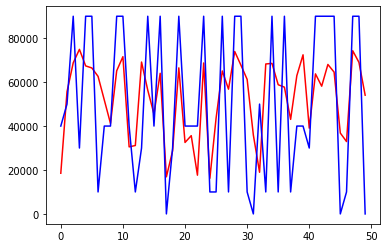

In [26]:
fig,ax=plt.subplots()
ax.plot(y_pred[:50], color="red",)
ax.plot(y_test[:50], color="blue",)
plt.show()